<a href="https://colab.research.google.com/github/HenryKB22/Alx_Dataset/blob/main/starter_notebook_guide_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Introduction

The followig aims to get you up and running with the predict.
Make a copy of the notebook and run all cells. We will also show you how to get your submission file from kaggle.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Installing packages
Please download all relevant packages in. There is no terminal so you will pip install everything.

You can find a list of recommended install from the Intro to Recommender sysytem notebook.

In [8]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

In [7]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 10.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505172 sha256=273cf56008c2eb4fd6b2c67acc89245fae06ac6507b92ac8602e44272d9f110b
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


## Reading in data

In [9]:
train_df = pd.read_csv('/content/drive/MyDrive/RECOMMEDER SYSTEM DATASET/train.csv')
movies_df = pd.read_csv('/content/drive/MyDrive/RECOMMEDER SYSTEM DATASET/movies.csv')
imdb_df = pd.read_csv('/content/drive/MyDrive/RECOMMEDER SYSTEM DATASET/imdb_data.csv')
test_df = pd.read_csv('/content/drive/MyDrive/RECOMMEDER SYSTEM DATASET/test.csv')
links_df = pd.read_csv('/content/drive/MyDrive/RECOMMEDER SYSTEM DATASET/links.csv')
tags = pd.read_csv('/content/drive/MyDrive/RECOMMEDER SYSTEM DATASET/tags.csv')
genome_scores = pd.read_csv('/content/drive/MyDrive/RECOMMEDER SYSTEM DATASET/genome_scores.csv')
genome_tags = pd.read_csv('/content/drive/MyDrive/RECOMMEDER SYSTEM DATASET/genome_tags.csv')
sample_submissions = pd.read_csv('/content/drive/MyDrive/RECOMMEDER SYSTEM DATASET/sample_submission.csv')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies_df.shape

(62423, 3)

## EDA


### Outliers
- **Identify outliers**: Outliers are data points that differ significantly from other observations. They can skew and mislead the training process of a machine learning model.
- **Detecting outliers**: Use statistical methods such as Z-scores or IQR (Interquartile Range) to detect outliers.
- **Handling outliers**: Decide whether to remove or transform the outliers depending on their impact on the dataset.

### Understanding Relationships Between Various Attributes and Structure of the Data
- **Correlation Analysis**: Use correlation matrices to understand the relationships between numerical attributes.
- **Visualization Techniques**: Employ scatter plots, pair plots, and heatmaps to visualize and explore relationships.
- **Data Structure**: Understand the structure of the data, including the distribution of values and the presence of any missing values.

### Recognizing Important Variables
- **Feature Importance**: Use techniques like Random Forests, Gradient Boosting, or SHAP values to determine feature importance.
- **Domain Knowledge**: Incorporate domain expertise to identify which variables are likely to be important.
- **Statistical Tests**: Conduct statistical tests to identify variables that have significant effects on the target variable.

By understanding the data through these steps, we ensure a robust foundation for building and evaluating machine learning models.


**Lets Check whether or not we have any missing values in our dataset**

In [16]:

# finding outliers in rating column

Q1 = train_df['rating'].quantile(0.25)
Q3 = train_df['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train_df[(train_df['rating'] < lower_bound) | (train_df['rating'] > upper_bound)]
print(outliers)

          userId  movieId  rating   timestamp
7          21066     2282     1.0   945785907
15         12942    48394     0.5  1280365881
33         36810     2012     1.0   942666645
42        142156     3991     1.0  1331437340
44        129978    96691     0.5  1389694200
...          ...      ...     ...         ...
9999919    59618    76293     0.5  1285374141
9999924   149056     2340     1.0  1515751143
9999990   148993   134853     0.5  1545727901
9999992    31470      337     1.0  1129625245
10000000   89307    96588     1.0  1459537073

[468784 rows x 4 columns]


In [17]:
train_df.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [18]:
print("Train: ")
print(str(train_df.isnull().sum()))
print("************")
print("Test: ")
print(str(test_df.isnull().sum()))
print("************")
print("Movies: ")
print(str(movies_df.isnull().sum()))
print("************")
print("Links: ")
print(str(links_df.isnull().sum()))
print("************")
print("IMDB: ")
print(str(imdb_df.isnull().sum()))
print("************")
print("Genome scores: ")
print(str(genome_scores.isnull().sum()))
print("************")
print("Genome tags: ")
print(str(genome_tags.isnull().sum()))

Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
************
Test: 
userId     0
movieId    0
dtype: int64
************
Movies: 
movieId    0
title      0
genres     0
dtype: int64
************
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
************
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
************
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
************
Genome tags: 
tagId    0
tag      0
dtype: int64


## Data Preparation

Data preparation is the process of preparing raw data so that it is suitable for further processing and analysis. Key steps include:

- **Collecting**: Gathering raw data from various sources.
- **Cleaning**: Removing or correcting any errors or inconsistencies in the data. This includes handling missing values, correcting data types, and removing duplicates.
- **Labeling**: Annotating data with labels that are required for supervised machine learning tasks. This involves identifying and marking the target variable.
- **Transforming**: Converting raw data into a format that is suitable for analysis. This includes normalization, scaling, encoding categorical variables, and feature engineering.
- **Exploring**: Analyzing the data to understand its structure and relationships. This step includes generating descriptive statistics and visualizing the data to identify patterns and insights.
- **Visualizing**: Creating graphical representations of the data to better understand distributions, trends, and relationships among variables. Common techniques include histograms, bar charts, scatter plots, and heatmaps.

By following these steps, raw data is transformed into a structured format that is ready for machine learning algorithms and further analysis.


In [19]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [21]:
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [22]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies_df[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


**Lets plot genres from most common to least common**

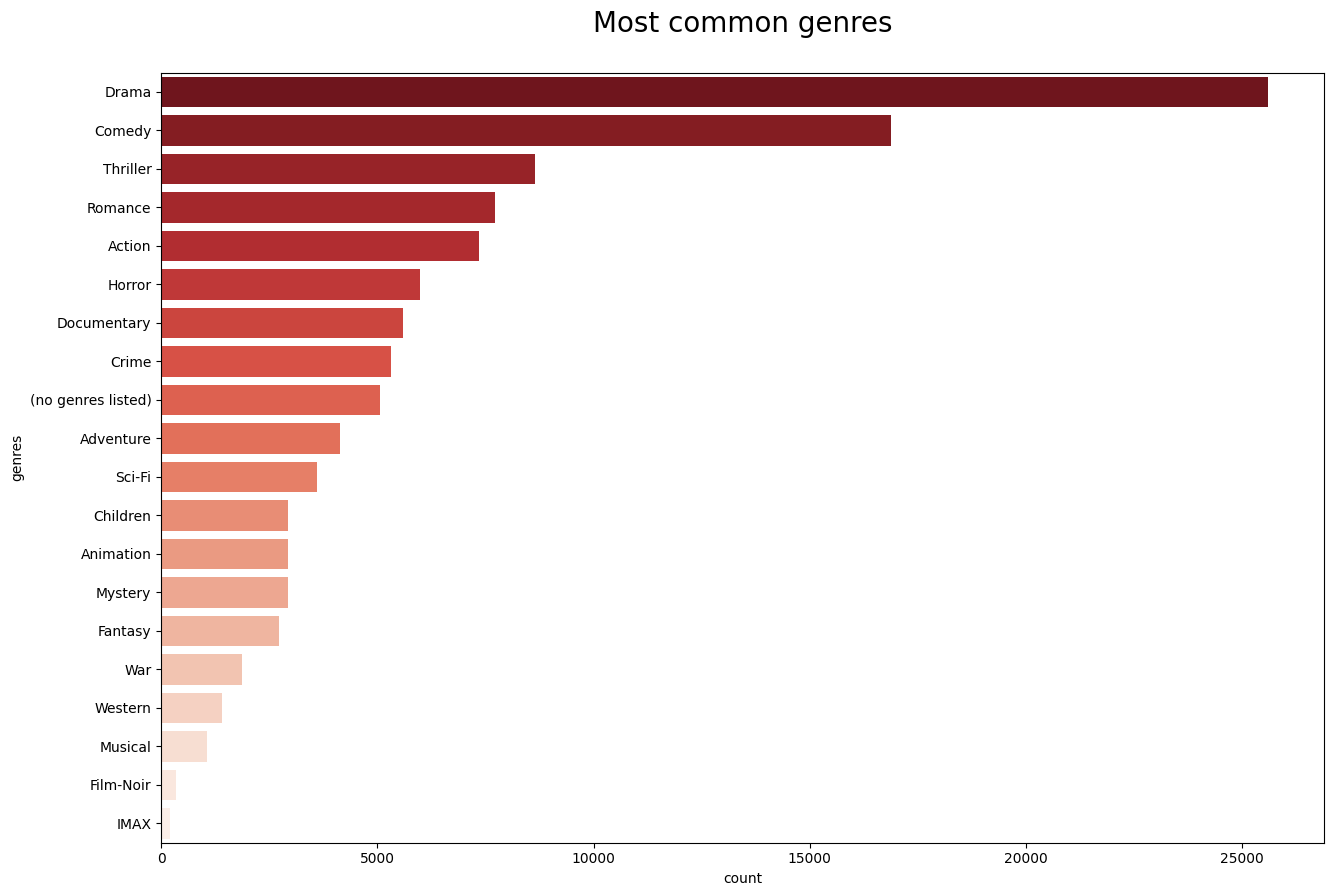

In [23]:
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='Reds_r')
plt.show()

## Modelling phase
 You only need to apply one version
be it Content based or Collabrative method



In [24]:
import pandas as pd
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

# Sample books data
books_data = {
    'bookId': [1, 2, 3, 4, 5, 6, 7],
    'title': ['To Kill a Mockingbird', '1984', 'The Great Gatsby', 'Pride and Prejudice', 'The Catcher in the Rye', 'Animal farm'
              ,'Harry Potter']
}

# Create the books DataFrame
books = pd.DataFrame(books_data)

# Sample user profiles
user_profiles = {
    1: {'bookId': [2, 3, 4], 'rating': [5, 4, 3]},
    2: {'bookId': [1, 3, 5], 'rating': [4, 5, 3]}
}

# Combine user profiles into a single DataFrame
all_ratings = []

for user_id, profile in user_profiles.items():
    for book_id, rating in zip(profile['bookId'], profile['rating']):
        all_ratings.append({'userId': user_id, 'bookId': book_id, 'rating': rating})

ratings_df = pd.DataFrame(all_ratings)

# Define the Reader and Dataset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'bookId', 'rating']], reader)


## Lets Build and Evaluate Our Model

In [25]:
# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, )

# Train the SVD model
svd = SVD()
svd.fit(trainset)

# Make predictions on the test set
predictions = svd.test(testset)

# Compute and print the RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

pred = pd.DataFrame(predictions)
pred

RMSE: 0.0695
RMSE: 0.06951518495371269


,uid,iid,r_ui,est,details
0,2,1,4.0,4.012725,{'was_impossible': False}
1,1,3,4.0,3.902518,{'was_impossible': False}


## Recommendation Function

In [26]:
# Function to get collaborative recommendations for a user profile
def get_collaborative_recommendations(user_id, svd, books, ratings_df, n=10):
    recommendations = []
    book_ids = books['bookId'].unique()

    for book_id in book_ids:
        prediction = svd.predict(user_id, book_id)
        actual_rating = ratings_df[(ratings_df['userId'] == user_id) & (ratings_df['bookId'] == book_id)]['rating']
        actual_rating = actual_rating.values[0] if not actual_rating.empty else None
        recommendations.append((books[books['bookId'] == book_id]['title'].values[0], prediction.est, actual_rating))

    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

    return recommendations[:n]

# Generate recommendations for each user profile and collect them in a list
all_recommendations = []

for user_id in user_profiles.keys():
    recommendations = get_collaborative_recommendations(user_id, svd, books, ratings_df)
    for title, predicted_rating, actual_rating in recommendations:
        all_recommendations.append({
            'userId': user_id,
            'Recommended Book': title,
            'Predicted_Rating': predicted_rating,
            'Actual Rating': actual_rating
        })

# Convert the list of recommendations to a DataFrame
recommendations_df = pd.DataFrame(all_recommendations)

recommendations_df

,userId,Recommended Book,Predicted_Rating,Actual Rating
0,1,1984,4.234329,5.0
1,1,To Kill a Mockingbird,4.012629,NaN
2,1,Animal farm,4.012629,NaN
3,1,Harry Potter,4.012629,NaN
4,1,The Great Gatsby,3.902518,4.0
5,1,The Catcher in the Rye,3.834430,NaN
6,1,Pride and Prejudice,3.683648,3.0
7,2,The Great Gatsby,4.271639,5.0
8,2,1984,4.074703,NaN
9,2,To Kill a Mockingbird,4.012725,4.0


# Generate your outputs here

Prepare Submission File
We make submissions in CSV files. Your submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the data is the string 'Id'). The prediction column will use the name of the target field.

We will create a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. Explicitly include the argument index=False to prevent pandas from adding another column in our csv file.

In [ ]:
# This is an example
my_submission = pd.DataFrame({'id': recommendations_df.userId,'predict': recommendations_df.Predicted_Rating})
#you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

# Tips
- NB:Read the description well
    - REMEMBER: Concatenated ID
    - Evatualtion metrics
- Sampling is your friend -> start small and scale up
- Data ingestioon, pleasse ensure the correct path is dependant on the environment
- Ensure test output matches dimension of test set for Kaggle submission
- 20 Submissions per day
- This is individual project
- Ensure email correlates to Athena for effective tracking
- If you use a shuffler ensure test output aligns with test sample ordering
  - (from sklearn.utils import shuffle), for randomness
- Make sure your notebook is in the same folder
- Analyse your data well
- Make sure you have gone through your content
